# Table of Contents

1. [Problem Statement](#pstatement)
2. [Imports and Environment Setup](#importsetup)
3. [Data Loading and Preprocessing](#dload)
4. [Data Spliting](#dsplit)
5. [Data Augmentation](#daugment)
6. [Model Building](#mbuild)
7. [Model Training](#mtrain)
8. [Performance Visualization](#pvis)
9. [Model Testing](#mtest)
10. [Performance Measures](#pmeasures)
11. [Qualitative Results](#qresults)

# 1. Problem Statement<a id='pstatement'><\a>

Classification of textures in human colorectal cancer histology images into 8 different classes.

# 2. Imports and Environment Setup

In [ ]:
#Imports the print function from newer versions of python
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm -r TCCCH

rm: cannot remove 'TCCCH': No such file or directory


In [ ]:
!git clone https://github.com/zeeshanalipnhwr/Texture-Classification-in-Colorectal-Cancer-Histology
!mv Texture-Classification-in-Colorectal-Cancer-Histology TCCCH

Cloning into 'Texture-Classification-in-Colorectal-Cancer-Histology'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 373 (delta 78), reused 0 (delta 0), pack-reused 212
Receiving objects: 100% (373/373), 1.38 MiB | 1.23 MiB/s, done.
Resolving deltas: 100% (169/169), done.


In [ ]:
from TCCCH.Configs import configs
from TCCCH.Utils import data_processing, display
from TCCCH.Utils.custom_matrics import f1_score
from TCCCH.Models import ResNet32

Using TensorFlow backend.


In [ ]:
configurations = configs.Configs()

In [ ]:
configurations.EPOCHS = 500

# 3. Data Loading and Preprocessing<a id='dload'><\a>

In [ ]:
!unzip "/content/drive/My Drive/Kather_texture_2016_image_tiles_5000"

Streaming output truncated to the last 5000 lines.
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10286_CRC-Prim-HE-01_002.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1030D_CRC-Prim-HE-02_031.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103B7_CRC-Prim-HE-02_026.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-02_025.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-10_013.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10437_CRC-Prim-HE-02_028.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/104D5_CRC-Prim-HE-09_024.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1055E_CRC-Prim-HE-01_027.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/105C1_CRC-Prim-HE-07_0

In [ ]:
!ls /content/Kather_texture_2016_image_tiles_5000

01_TUMOR   03_COMPLEX  05_DEBRIS  07_ADIPOSE
02_STROMA  04_LYMPHO   06_MUCOSA  08_EMPTY


In [ ]:
images, labels = data_processing.load_data(configurations)
print ("Data of size: {} loaded!".format(images.shape[0]))

loading images of class label: EMPTY..
Done!
loading images of class label: LYMPHO..
Done!
loading images of class label: MUCOSA..
Done!
loading images of class label: TUMOR..
Done!
loading images of class label: COMPLEX..
Done!
loading images of class label: ADIPOSE..
Done!
loading images of class label: STROMA..
Done!
loading images of class label: DEBRIS..
Done!
Data of size: 5000 loaded!


## Data Visualization

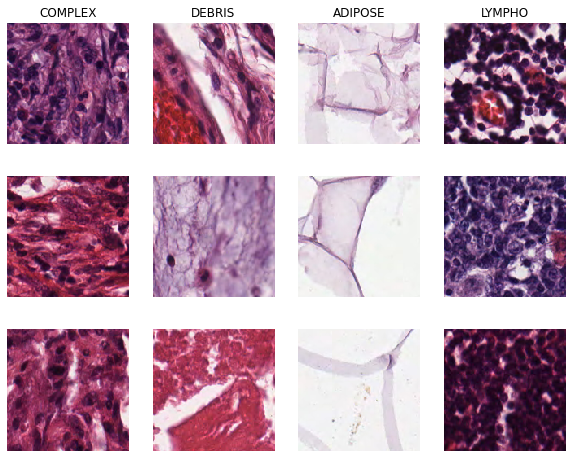

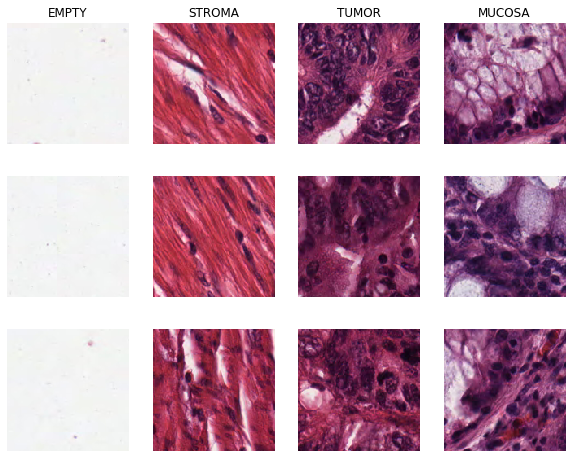

In [ ]:
display.visualize_samples(images, labels, list(set(labels))[:4])
display.visualize_samples(images, labels, list(set(labels))[4:])

# 4. Data Spliting<a id='dsplit'><\a>
Split the data into training, validation, and testing sets.

In [ ]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = data_processing.train_valididation_test_split(
    images, labels, sizes=[3000, 1000, 1000])

Y_train, Y_valid, Y_test = data_processing.labels_binarizer(Y_train, Y_valid, Y_test)

print ("X_train: ", np.shape(X_train), "\nY_train: ", np.shape(Y_train))
print ("X_valid: ", np.shape(X_valid), "\nY_valid: ", np.shape(Y_valid))
print ("X_test: ", np.shape(X_test), "\nY_test: ", np.shape(Y_test))

X_train:  (3000, 150, 150, 3) 
Y_train:  (3000,)
X_valid:  (1000, 150, 150, 3) 
Y_valid:  (1000,)
X_test:  (1000, 150, 150, 3) 
Y_test:  (1000,)


# 5. Data Augmentation<a id='daugment'><\a>
Apply different transformations to the data to increase its diversity.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 'augmentor' is the image data generator for data augmentation
augmentor = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

augmented_train_data = augmentor.flow(X_train, Y_train, batch_size=configurations.BATCHSIZE)
augmented_valid_data = augmentor.flow(X_valid, Y_valid, batch_size=configurations.BATCHSIZE)

In [ ]:
del images, X_train, Y_train, X_valid, Y_valid

In [ ]:
labels = np.copy(np.unique(labels)) # save the unique class names as 'labels'
labels

array(['ADIPOSE', 'COMPLEX', 'DEBRIS', 'EMPTY', 'LYMPHO', 'MUCOSA',
       'STROMA', 'TUMOR'], dtype='<U7')

# 6. Model Building<a id='mbuild'><\a>

In [ ]:
model = ResNet32.ResNet32(input_shape=augmented_train_data[0][0][0].shape,
                 classes=configurations.NUMCLASSES).create_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        9472      
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 64)        0   

# 7. Model Training<a id='mtrain'><\a>

In [ ]:
# compile the model
model.compile(loss=configurations.LOSS, optimizer=configurations.OPTIMIZER, metrics=configurations.METRICS + [f1_score])
 
# train the network
H = model.fit_generator(augmented_train_data, validation_data=augmented_valid_data, epochs=configurations.EPOCHS)


Epoch 1/500
94/94 [==============================] - 57s 609ms/step - loss: 3.2324 - accuracy: 0.3853 - f1_score: 2.3282 - val_loss: 18.0055 - val_accuracy: 0.1160 - val_f1_score: 0.9360
Epoch 2/500
94/94 [==============================] - 46s 489ms/step - loss: 1.6557 - accuracy: 0.5200 - f1_score: 1.9948 - val_loss: 842.0753 - val_accuracy: 0.2240 - val_f1_score: 1.5915
Epoch 3/500
94/94 [==============================] - 46s 489ms/step - loss: 1.7926 - accuracy: 0.5117 - f1_score: 2.0526 - val_loss: 4.1620 - val_accuracy: 0.2270 - val_f1_score: 0.9813
Epoch 4/500
94/94 [==============================] - 46s 491ms/step - loss: 4.6232 - accuracy: 0.4193 - f1_score: 2.2009 - val_loss: 210.6918 - val_accuracy: 0.2010 - val_f1_score: 1.0031
Epoch 5/500
94/94 [==============================] - 46s 490ms/step - loss: 3.8708 - accuracy: 0.3797 - f1_score: 2.7107 - val_loss: 939764.8125 - val_accuracy: 0.1300 - val_f1_score: 0.9342
Epoch 6/500
94/94 [==============================] - 46s 48

Save the model weights

In [ ]:
# save the model for future use or deployment
model.save("/content/drive/My Drive/tccch_resnet32.model")

# 8. Performance Visualization<a id='pvis'><\a>

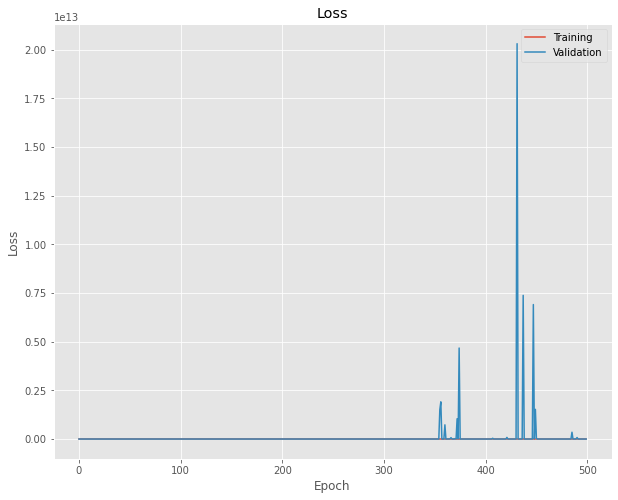

In [ ]:
display.plot_training_losses(H, configurations)

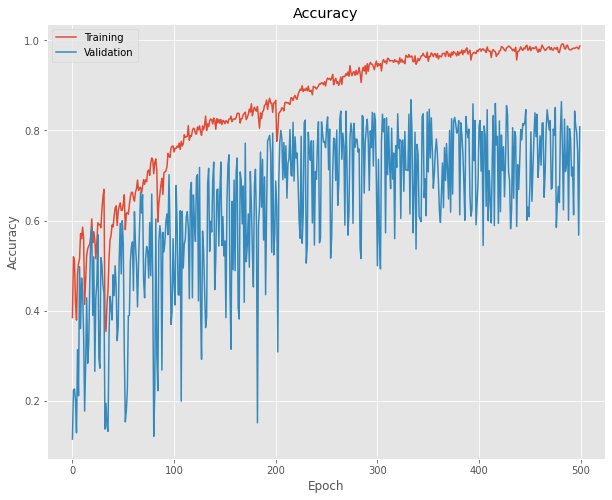

In [ ]:
display.plot_training_accuracies(H, configurations)

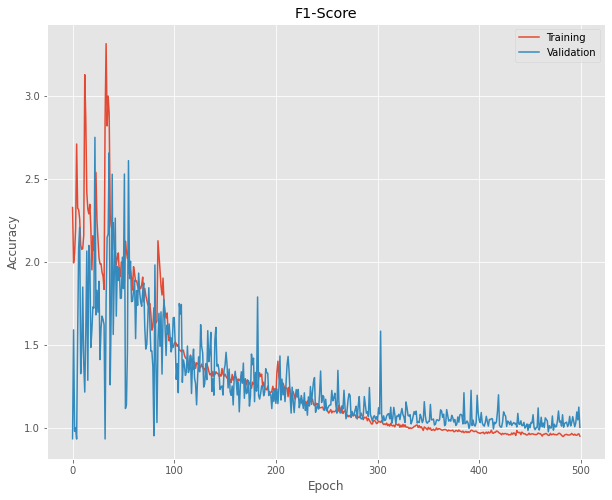

In [ ]:
display.plot_training_f1_scores(H, configurations)

# 9. Model Testing<a id='mtest'><\a>

In [ ]:
# evaluate the network
test_loss, test_acc, test_f1 = model.evaluate(X_test, Y_test, batch_size=configurations.BATCHSIZE)

1000/1000 [==============================] - 5s 5ms/step


# 10. Performance Measures<a id='pmeasures'><\a>

## Loss

In [ ]:
print ("Loss:", test_loss)

Loss: 30.06561016511917


## Accuracy
It is defined as $accuracy = \frac{TP+TN}{TP+FP+TN+FN}$.

In [ ]:
print ("Accuracy:", test_acc)

Accuracy: 0.8450000286102295


## F1 Score

It is defined as the harmonic mean of precision and recall as $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$ where $precision=\frac{TP}{TP+FP}$ and $recall=\frac{TP}{TP+FN}$.

In [ ]:
print ("F1 Score:", test_f1)

F1 Score: 0.9875030517578125


In [ ]:
# make predictions on the network
predictions = model.predict(X_test, batch_size=configurations.BATCHSIZE)

In [ ]:
predictions = np.argmax(predictions, axis=-1)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[115,   0,   1,  13,   0,   0,   0,   0],
       [  0,  61,   0,   0,   8,   0,  54,   3],
       [  7,   0,  93,   0,   0,   0,  29,   1],
       [  1,   0,   0, 140,   0,   0,   0,   0],
       [  0,   5,   0,   0, 124,   0,   0,   0],
       [  0,   0,   4,   0,   6, 103,   0,   5],
       [  0,   0,   4,   0,   2,   0, 108,   1],
       [  0,   4,   0,   0,   3,   2,   2, 101]])

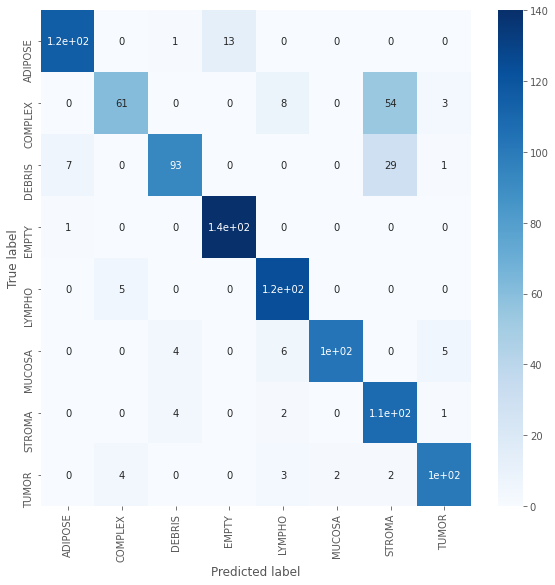

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True,cmap=plt.cm.Blues,
            xticklabels=labels, yticklabels=labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       129
           1       0.87      0.48      0.62       126
           2       0.91      0.72      0.80       130
           3       0.92      0.99      0.95       141
           4       0.87      0.96      0.91       129
           5       0.98      0.87      0.92       118
           6       0.56      0.94      0.70       115
           7       0.91      0.90      0.91       112

    accuracy                           0.84      1000
   macro avg       0.87      0.84      0.84      1000
weighted avg       0.87      0.84      0.84      1000



# 11. Qualitative Results

True class: MUCOSA
Predicted class: MUCOSA.


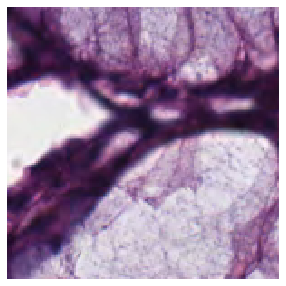


True class: LYMPHO
Predicted class: LYMPHO.


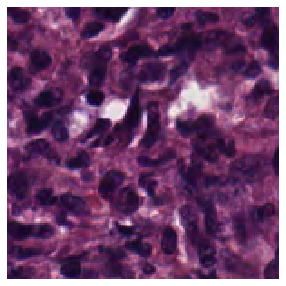


True class: LYMPHO
Predicted class: LYMPHO.


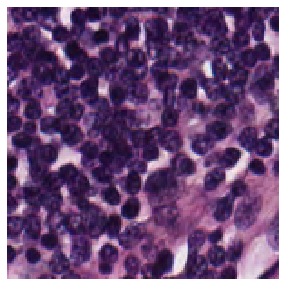


True class: EMPTY
Predicted class: EMPTY.


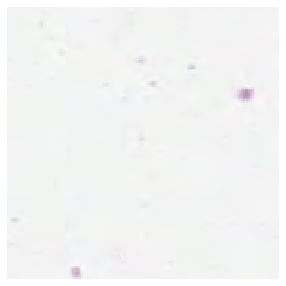


True class: EMPTY
Predicted class: EMPTY.


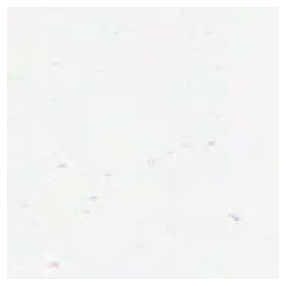

In [ ]:
display.display_sample_correct_predictions(X_test, Y_test, predictions, labels)

True class: COMPLEX
Predicted class: STROMA.


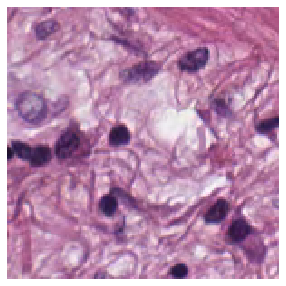


True class: COMPLEX
Predicted class: STROMA.


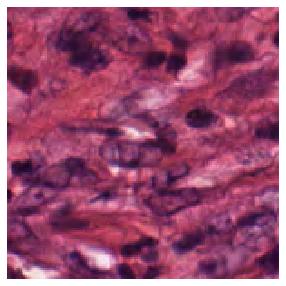


True class: TUMOR
Predicted class: LYMPHO.


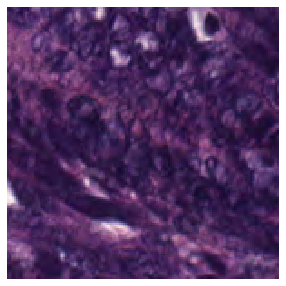


True class: DEBRIS
Predicted class: STROMA.


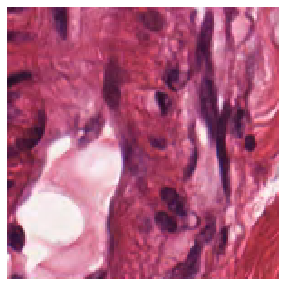


True class: DEBRIS
Predicted class: ADIPOSE.


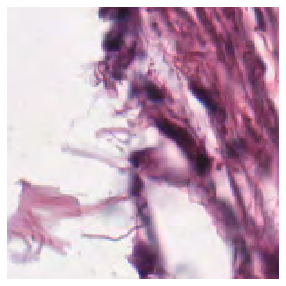

In [ ]:
display.display_sample_incorrect_predictions(X_test, Y_test, predictions, labels)